In [ ]:
#Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install library yang dibutuhkan
!pip install wordcloud

import os
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import csv
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import requests

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import GaussianNB

In [ ]:
#Memuat data XLSX
df = pd.read_excel('/content/drive/MyDrive/DataSet/iti/preprocessing.xlsx')
df

,content,ulasan
0,puas belum panggilan sama sekali,positif
1,terima,positif
2,bantu,positif
3,lokernya banyak sales loker loker,negatif
4,aplikasi bagus lowongan sedia cuma pihak lulus...,positif
...,...,...
808,bintang admin udah bantu jawab tanya sabar,positif
809,kasih bintang dulu karna panggil kerja,negatif
810,aplikasi mudah guna info loker luas lengkap ap...,positif
811,mantap aplikasi bantu,positif


In [ ]:
#cek data duplikat
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
808    False
809    False
810    False
811    False
812    False
Length: 813, dtype: bool

In [ ]:
#menampilkan jumlah data ulasan positif, netral, negatif
ulasan_bar_df = df['ulasan'].value_counts()
print(f'index: {ulasan_bar_df.index}')
print(f'values: {ulasan_bar_df.values}')
print(f'all_values: {ulasan_bar_df.sum()}')

index: Index(['positif', 'negatif', 'netral'], dtype='object')
values: [714  74  25]
all_values: 813


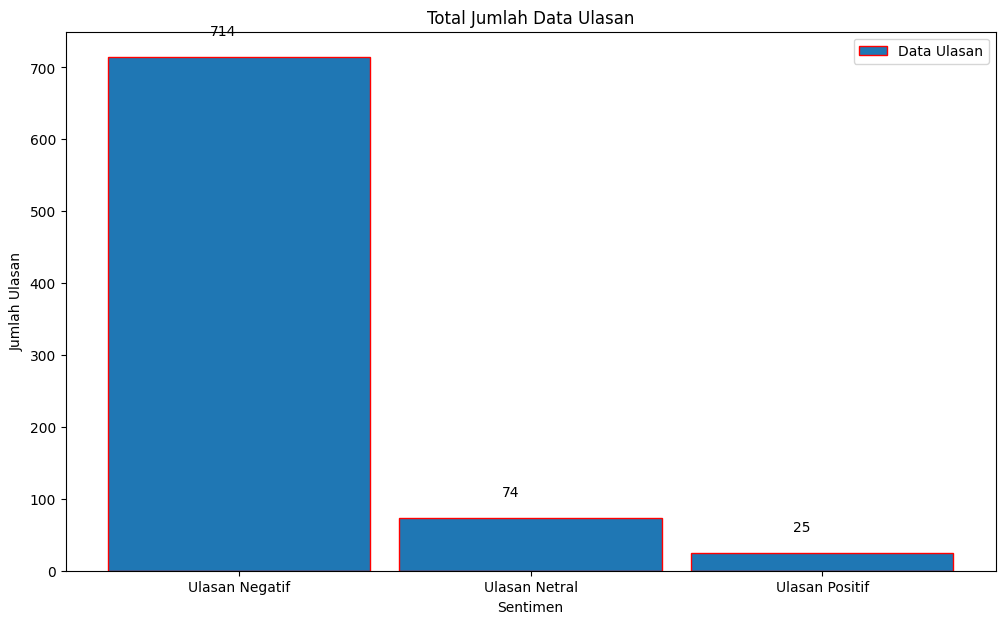

In [ ]:
#Grafik perbandingan jumlah ulasan
plt.figure(figsize = (12,7))

ulasan = ['Ulasan Negatif', 'Ulasan Netral', 'Ulasan Positif']
plt.bar(ulasan, ulasan_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)


i = 1.0
j = 30

for i in range(len(ulasan)):
    plt.annotate(ulasan_bar_df.values[i], (-0.1 + i, ulasan_bar_df.values[i] + j))


plt.legend(labels = ['Data Ulasan'])


plt.title("Total Jumlah Data Ulasan")


plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')

# plt.savefig('barplot-tweet.png')

plt.show()

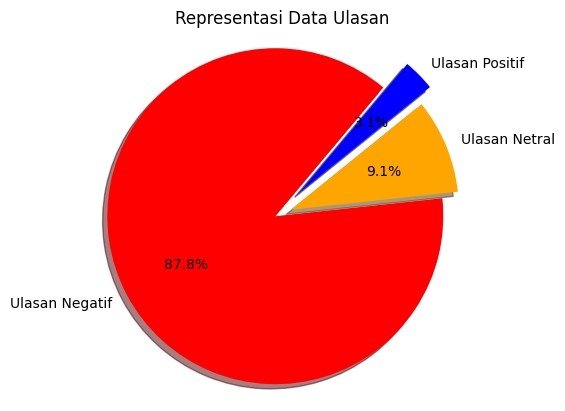

In [ ]:
#diagram pie
my_labels = 'Ulasan Negatif','Ulasan Netral', 'Ulasan Positif'
my_colors = ['Red', 'Orange', 'Blue']

my_explode = (0, 0.1, 0.2)
plt.pie(ulasan_bar_df.values, labels=my_labels, autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Representasi Data Ulasan')
plt.axis('equal')

plt.show()

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.10
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['ulasan'],
                                                    test_size = 0.10,
                                                    random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

x = df.content
y = df.ulasan

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x = tfidf_vectorizer.fit_transform(x)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test= tfidf_vectorizer.transform(X_test)

In [ ]:
print(x)

  (0, 975)	0.4852665276308587
  (0, 941)	0.3331381268791133
  (0, 779)	0.4852665276308587
  (0, 120)	0.45719349445374535
  (0, 861)	0.45719349445374535
  (1, 1100)	1.0
  (2, 96)	1.0
  (3, 590)	0.5747124271311272
  (3, 940)	0.5172812931306705
  (3, 98)	0.5018014108023362
  (3, 592)	0.3877125662071001
  (4, 167)	0.36646832422547626
  (4, 1131)	0.31330029273779847
  (4, 596)	0.36646832422547626
  (4, 811)	0.406688387399342
  (4, 602)	0.17311620556112473
  (4, 824)	0.3262482610516104
  (4, 230)	0.28602819787774464
  (4, 970)	0.2791938035849156
  (4, 597)	0.3716114178467441
  (4, 75)	0.15028389873468326
  (4, 52)	0.10488404217147282
  (5, 288)	0.32677535104182914
  (5, 925)	0.31992991503245777
  (5, 180)	0.18874812767623073
  :	:
  (810, 211)	0.18864238025944435
  (810, 1008)	0.15470193295918291
  (810, 457)	0.2215504007921303
  (810, 46)	0.16335241478034065
  (810, 242)	0.14009647947865636
  (810, 838)	0.16335241478034065
  (810, 225)	0.15321052198127486
  (810, 576)	0.16335241478034065
  

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(731,)
(731,)
(82,)
(82,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)


print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average="weighted"))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average="weighted"))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average="weighted"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))



MultinomialNB Accuracy: 0.9146341463414634
MultinomialNB Precision: 0.8857098186366479
MultinomialNB Recall: 0.9146341463414634
MultinomialNB f1_score: 0.8902166202870082
confusion_matrix:
 [[ 4  0  4]
 [ 0  0  3]
 [ 0  0 71]]

              precision    recall  f1-score   support

     negatif       1.00      0.50      0.67         8
      netral       0.00      0.00      0.00         3
     positif       0.91      1.00      0.95        71

    accuracy                           0.91        82
   macro avg       0.64      0.50      0.54        82
weighted avg       0.89      0.91      0.89        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


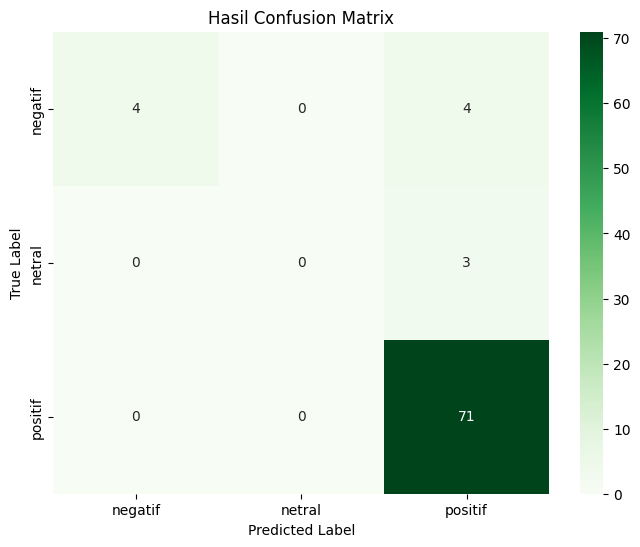

In [ ]:
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Hasil Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
df = df.replace({'negatif':0, 'netral':1, 'positif':2})
df

,content,ulasan
0,puas belum panggilan sama sekali,2
1,terima,2
2,bantu,2
3,lokernya banyak sales loker loker,0
4,aplikasi bagus lowongan sedia cuma pihak lulus...,2
...,...,...
808,bintang admin udah bantu jawab tanya sabar,2
809,kasih bintang dulu karna panggil kerja,0
810,aplikasi mudah guna info loker luas lengkap ap...,2
811,mantap aplikasi bantu,2


In [ ]:
data_negatif = df[df['ulasan'] == 0]
data_netral = df[df['ulasan'] == 1]
data_positif = df[df['ulasan'] == 2]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


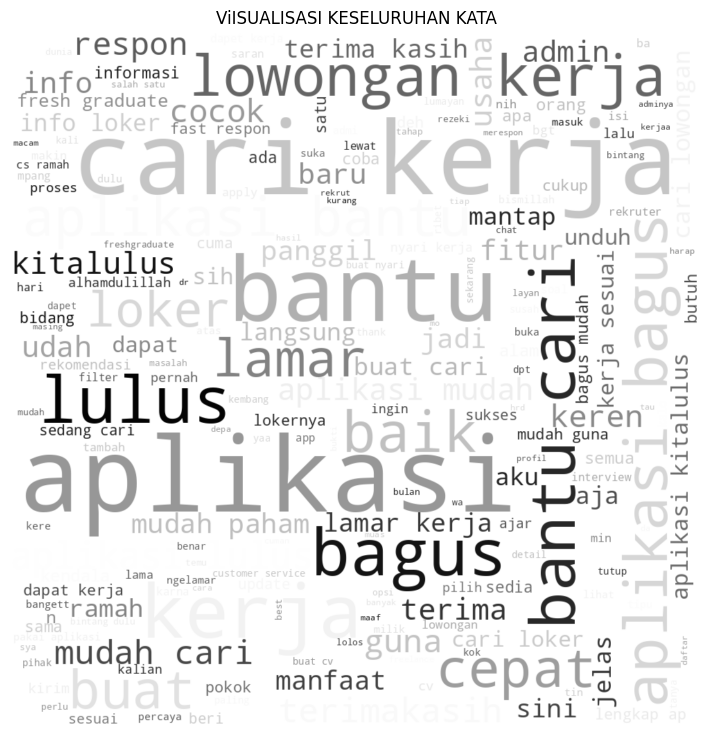

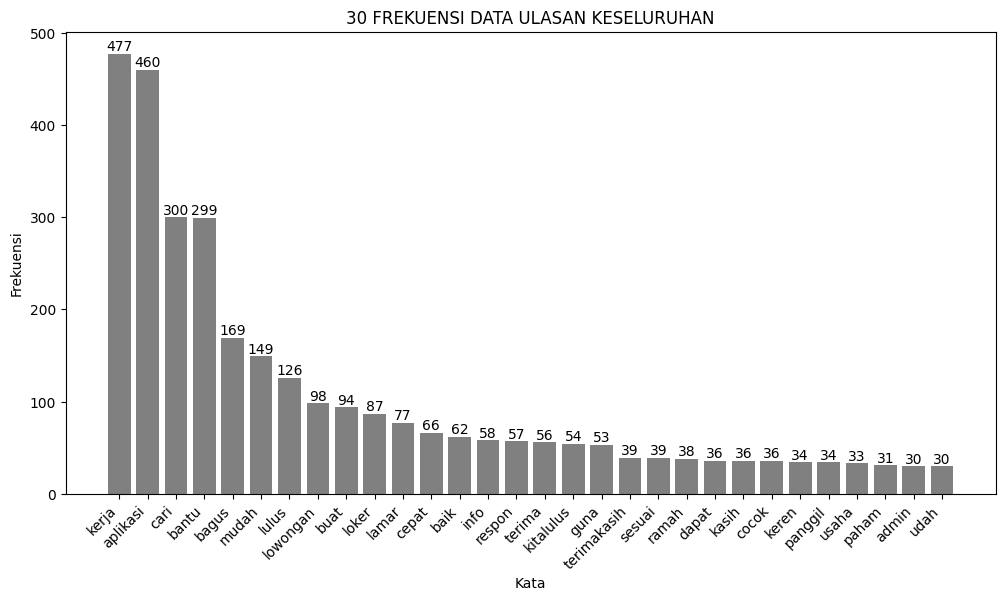

In [ ]:
#word cloud ulasan keseluruhan
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')



# Ambil semua teks ulasan
all_text = ' '.join(word for word in df['content'])

# Buat WordCloud untuk keseluruhan ulasan
#wordcloud_all = WordCloud(colormap='Greys', width=1000, height=1000, max_font_size=150, background_color='white').generate(all_text)
# Ambil 10 kata tertinggi berdasarkan frekuensinya
top_words_all = word_freq_df_all.head(10)

# Buat WordCloud untuk 10 kata tertinggi
wordcloud_top = WordCloud(colormap='Greys', width=800, height=400, max_font_size=150, background_color='white').generate_from_frequencies(dict(top_words_all.values))



# Tampilkan WordCloud keseluruhan ulasan
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("ViISUALISASI KESELURUHAN KATA")
plt.show()

# Tokenisasi kata
tokens_all = word_tokenize(all_text)

# Hitung frekuensi kata untuk keseluruhan ulasan
word_freq_all = Counter(tokens_all)

# Konversi hasil ke DataFrame
word_freq_df_all = pd.DataFrame(list(word_freq_all.items()), columns=['Kata', 'Frekuensi'])

# Urutkan berdasarkan frekuensi
word_freq_df_all = word_freq_df_all.sort_values(by='Frekuensi', ascending=False)

# Tampilkan grafik frekuensi kata untuk keseluruhan ulasan
plt.figure(figsize=(12, 6))
bars_all = plt.bar(word_freq_df_all['Kata'][:30], word_freq_df_all['Frekuensi'][:30], color='grey')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('30 FREKUENSI DATA ULASAN KESELURUHAN')  # Ubah judul sesuai kebutuhan
plt.xticks(rotation=45, ha='right')

# Tambahkan label frekuensi di atas batang grafik
for bar in bars_all:
    yval_all = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval_all + 0.05, round(yval_all, 2), ha='center', va='bottom')

plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


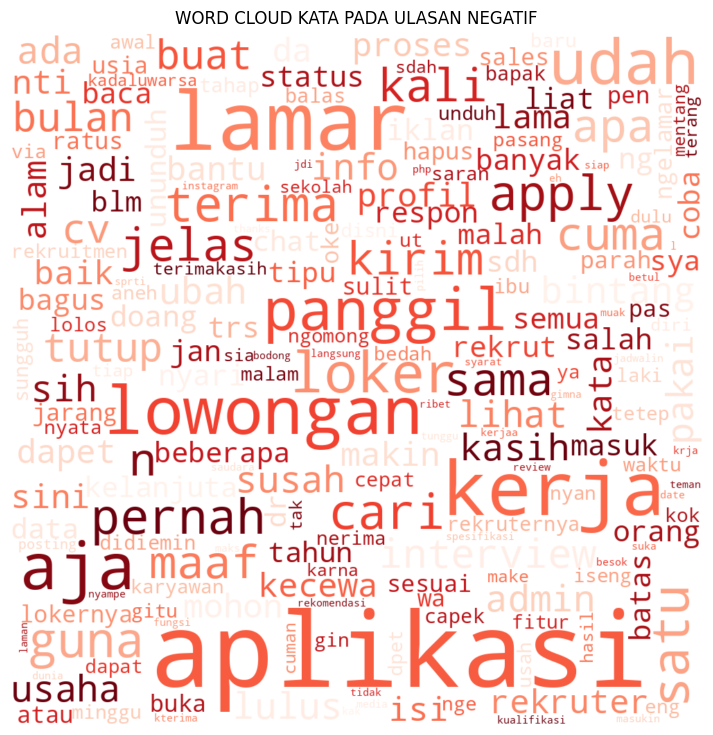

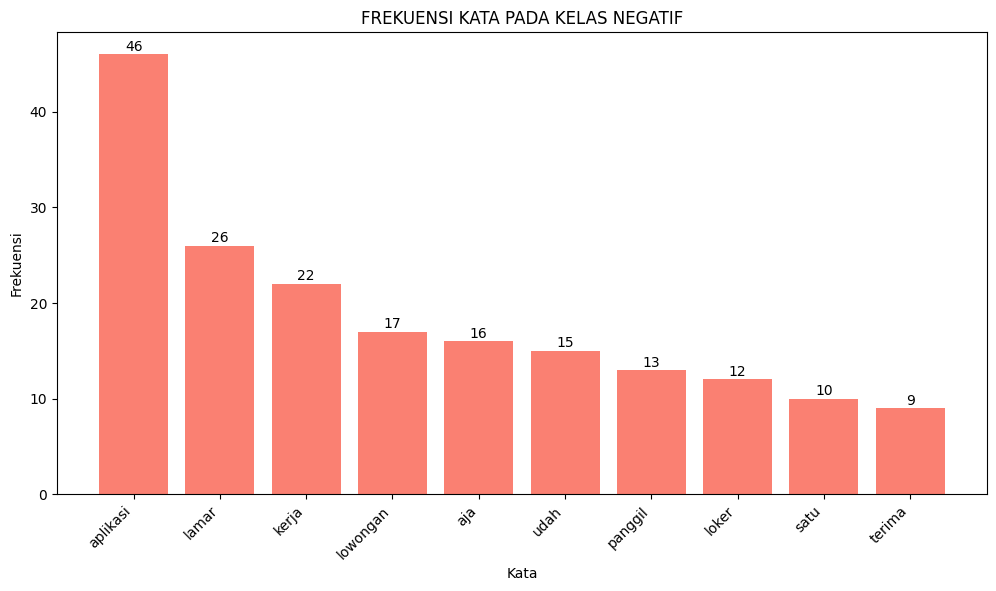

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Ambil data negatif dan gabungkan menjadi satu teks
all_text_negatif = ' '.join(word for word in data_negatif['content'])

# Buat WordCloud
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, max_font_size=150, background_color='white').generate(all_text_negatif)

# Tampilkan WordCloud
plt.figure(figsize=(9, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WORD CLOUD KATA PADA ULASAN NEGATIF")
plt.show()

# Hitung frekuensi kata
# Tokenisasi kata
tokens = word_tokenize(all_text_negatif)

# Hitung frekuensi kata
word_freq = Counter(tokens)

# Konversi hasil ke DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Frekuensi'])

# Urutkan berdasarkan frekuensi
word_freq_df = word_freq_df.sort_values(by='Frekuensi', ascending=False)

# Tampilkan grafik frekuensi kata (top 30)
plt.figure(figsize=(12, 6))
bars = plt.bar(word_freq_df['Kata'][:10], word_freq_df['Frekuensi'][:10], color='salmon')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('FREKUENSI KATA PADA KELAS NEGATIF')  # Ubah judul sesuai kebutuhan
plt.xticks(rotation=45, ha='right')

# Tambahkan label frekuensi di atas batang grafik
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


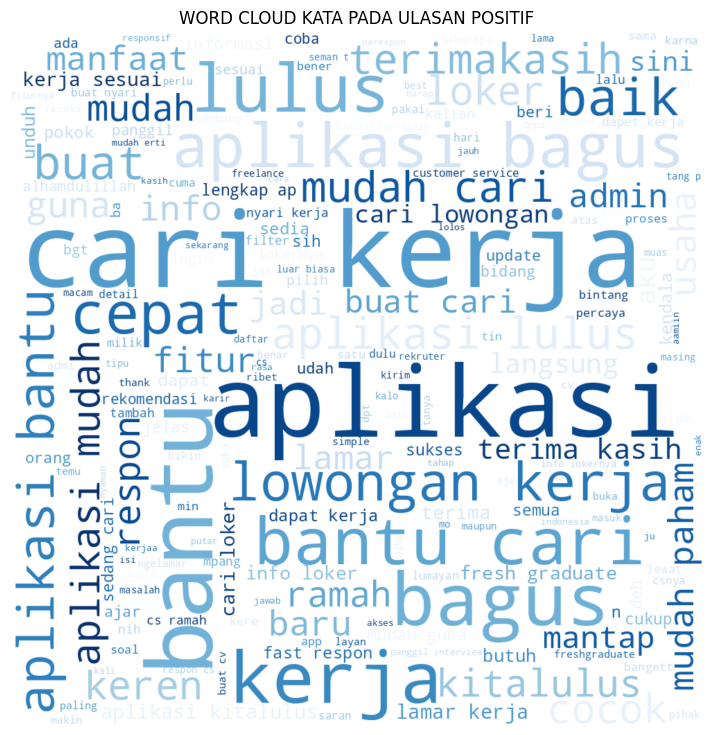

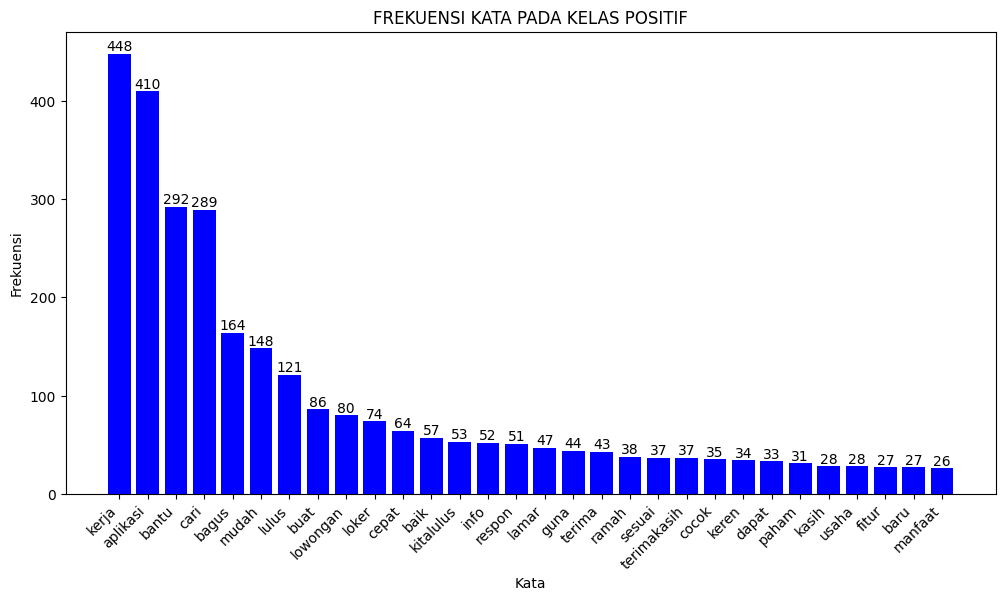

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')


# Ambil data negatif dan gabungkan menjadi satu teks
all_text_positif = ' '.join(word for word in data_positif['content'])

# Buat WordCloud
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, max_font_size=150, background_color='white').generate(all_text_positif)

# Tampilkan WordCloud
plt.figure(figsize=(9, 9))
#plt.figure(figsize=(12, 8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WORD CLOUD KATA PADA ULASAN POSITIF")
plt.show()

# Hitung frekuensi kata
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenisasi kata
tokens = word_tokenize(all_text_positif)

# Hitung frekuensi kata
word_freq = Counter(tokens)

# Konversi hasil ke DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Frekuensi'])

# Urutkan berdasarkan frekuensi
word_freq_df = word_freq_df.sort_values(by='Frekuensi', ascending=False)

# Tampilkan grafik frekuensi kata
plt.figure(figsize=(12, 6))
bars = plt.bar(word_freq_df['Kata'][:30], word_freq_df['Frekuensi'][:30], color='blue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('FREKUENSI KATA PADA KELAS POSITIF')  # Ubah judul sesuai kebutuhan
plt.xticks(rotation=45, ha='right')

# Tambahkan label frekuensi di atas batang grafik
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


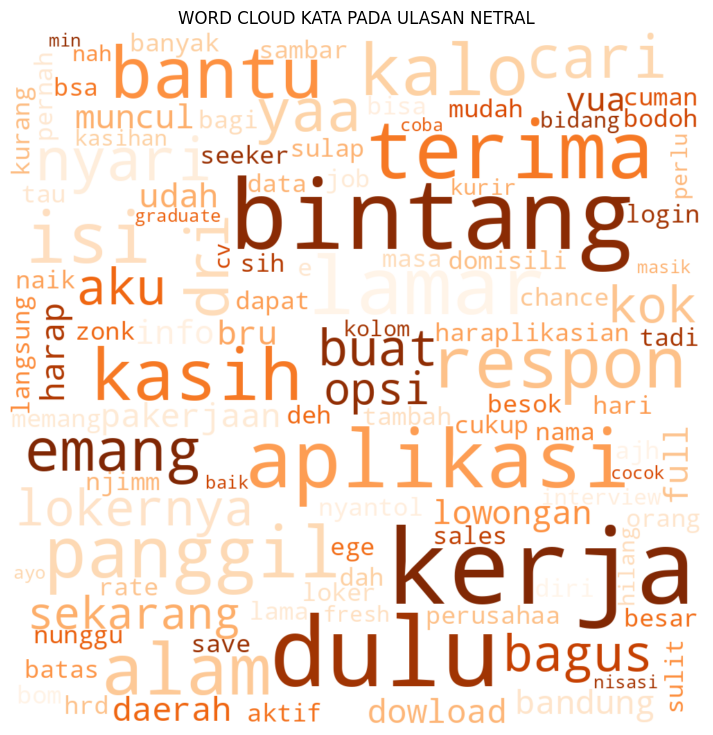

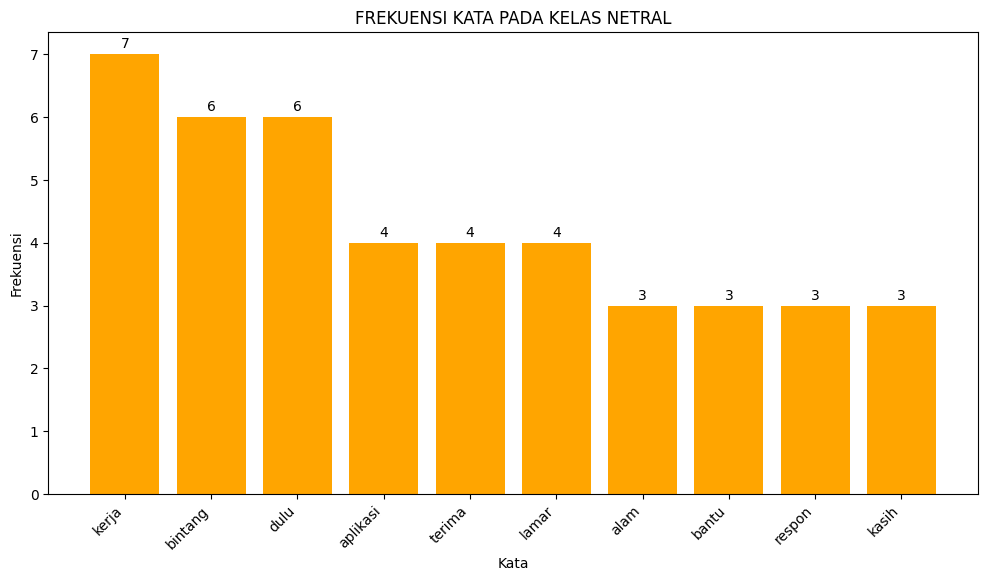

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')


# Ambil data negatif dan gabungkan menjadi satu teks
all_text_netral = ' '.join(word for word in data_netral['content'])

# Buat WordCloud
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, max_font_size=150, background_color='white').generate(all_text_netral)

# Tampilkan WordCloud
plt.figure(figsize=(9, 9))
#plt.figure(figsize=(12, 8))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WORD CLOUD KATA PADA ULASAN NETRAL")
plt.show()

# Hitung frekuensi kata
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenisasi kata
tokens = word_tokenize(all_text_netral)

# Hitung frekuensi kata
word_freq = Counter(tokens)

# Konversi hasil ke DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Kata', 'Frekuensi'])

# Urutkan berdasarkan frekuensi
word_freq_df = word_freq_df.sort_values(by='Frekuensi', ascending=False)

# Tampilkan grafik frekuensi kata
plt.figure(figsize=(12, 6))
bars = plt.bar(word_freq_df['Kata'][:10], word_freq_df['Frekuensi'][:10], color='orange')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('FREKUENSI KATA PADA KELAS NETRAL')  # Ubah judul sesuai kebutuhan
plt.xticks(rotation=45, ha='right')

# Tambahkan label frekuensi di atas batang grafik
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.show()